In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import matplotlib
import re
from datetime import datetime
from wordcloud import WordCloud 
import jieba
import jieba.analyse
from datetime import date
import re
import string
from wordcloud import WordCloud 

### 前處理

In [2]:
df_ = pd.read_csv('./Job_details.csv')
df_.drop('Unnamed: 0', axis=1,inplace=True)
print(df_.shape)
df_.head()

(2015, 8)


,date,Url,content,reaction_like_count,comment_num,poster,posterUrl,comments
0,2023-04-27,https://mbasic.facebook.com/groups/jobsandinte...,哈囉～幫現在的公司招募實習生，本人心得在工作資訊下方！。 沂動行銷公司 徵求商務拓展部門實習...,4,1,Hope Hsueh,https://mbasic.facebook.com/hopegenius?eav=AfY...,"[{'poster': '林裕棠', 'posterUrl': 'https://mbasi..."
1,2023-04-29,https://mbasic.facebook.com/groups/jobsandinte...,代朋友PO #徵才 訊息󠀠󠀠【公司名稱】Beta Financehttps://www.be...,55,3,游祖鈞,https://mbasic.facebook.com/tzuchun42?eav=Afbw...,"[{'poster': '歐陽廷', 'posterUrl': 'https://mbasi..."
2,2023-04-27,https://mbasic.facebook.com/groups/jobsandinte...,【實習】Quantum International Corp (QIC) 2023-2024...,13,0,陳柏諭,https://mbasic.facebook.com/Yu.Chen.890711?eav...,NaN
3,2023-04-29,https://mbasic.facebook.com/groups/jobsandinte...,#徵才 投顧公司徵特助、財務、人事行政🙋✨歡迎加入TAROBO✨☉公司名稱：大拇哥證券投資顧...,2,0,蘇輗,https://mbasic.facebook.com/niyessu?eav=AfZKua...,NaN
4,2023-04-27,https://mbasic.facebook.com/groups/jobsandinte...,(代po)【Position Title】PChome Corporate Developm...,24,4,彭寶萱,https://mbasic.facebook.com/pengpaohsuan?eav=A...,"[{'poster': '司惟之', 'posterUrl': 'https://mbasi..."


In [30]:
text = df_.loc[5,'content']
text

'＃實習 ＃實習機會 ＃新創 ＃車聯網 ＃學生實習 ＃大學生實習 ＃商業開發 ＃BD實習【公司名稱】三維人股份有限公司（3drens）【工作職缺】商業開發實習生 Business Development (BD) Intern【公司簡介】3drens團隊正在打造一個顛覆台灣物流業的產品：中小企業專屬的物流系統！透過這樣的系統可以讓物流業達到數位轉型，使物流運輸更有效率！近期更獲得近一億台幣的Pre-A輪募資，未來也會更強化在技術研發與商務拓展。同時，我們也非常重視每位人才的價值，期待與更多優秀的夥伴們協助商用車隊給人們「水喔！」的體驗！【交通位置】近公館捷運站步行約6分鐘，鄰近台大商圈，周邊美食任你挑！【工作內容】成為在外開疆闢土BD們的最強後盾💪商業開發：透過分析市場條件和發展趨勢找尋潛在客戶，並協助聯絡客戶以瞭解需求，提供適合的解決方案。客情維護：定期拜訪既有客戶，促進客戶滿意度與忠誠度資源整合：與產品團隊密切合作，整合行銷資源提高商務合作機會文書處理：參與商務發展相關工作，協助撰寫提案、業務報表、開立合約與報價單等事宜其他主管交辦事項（例如陪同參展、出差拜訪客戶等，支出會由公司支付）【徵求條件】大四以上優先，且可配合實習6個月以上，未來能轉正職者為佳（不限學生身份）具備流利的英文聽說讀寫能力，面對海外客戶可以自信地對談具備積極主動的態度、良好的溝通技巧，富有同理心與耐心，喜愛與人交流......等等，簡言之，你需要是人際關係達人！你需要能夠有效率且細心地工作，善於分配時間、獨立處理職務，並能在同時進行多項任務時確保高效執行。你需要是個挑戰者，對新科技充滿熱情，擁有開朗樂觀的個性，並且擅長思考問題、發現問題並解決問題。具備良好規劃能力，擁有編寫報告及簡報的才能，並希望未來在商務開發領域快速成長。不排斥任何商業新知的學習，能自行查找學習資源並實際嘗試運用良好的跨部門協作與高情商，能夠交換資訊並釐清彼此期望，使彼此以組織目標為優先，支持共同的決定。【有無勞健保】有！【薪資】每小時基本工資為 180 元【公司福利】零食櫃－滿滿的零食任你吃team building聚餐－維繫夥伴們之間的感情豐富的學習資源－目前有HBR、經理人雜誌等資源，其他想學習的公司替你出！貓貓們不定時出沒－上班之餘還可以擼貓【工作地點】台北市中正區思源街18號【電腦設備】需自備！（可討論）【其他條

In [3]:
def preprocess(text):
    mail_pattern = re.compile(r'\S+@\S+')
    tmp_text = mail_pattern.sub('', text)
    url_pattern = re.compile(r'https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+')
    nourl_text = url_pattern.sub('', tmp_text)
    nourl_text = re.sub(r'\u3000', '。', nourl_text)
    nourl_text = re.sub(r'\U000e0020\U000e0020', '。', nourl_text)
    chiness_pattern = re.compile(r'[\u4e00-\u9fa5a-zA-Z0-9.，。]+')
    first_text = ' '.join(chiness_pattern.findall(nourl_text))
    return first_text

In [101]:
segmentation_used_note = (";", "；", "！", "!", "？", "?", "。")
def sentence_segmentation(df, target_column, segment_symboles=[]):
    regexPattern = '['+'|'.join(segment_symboles)+']'
    sentenceCheckRegexPattern = '[,|.| |\t|\n]'

    result = []
    
    for row_dict in df.to_dict(orient="records"):
        sentences = re.split(regexPattern, row_dict[target_column])
        count = 1
        for sent in sentences:
            if re.sub(sentenceCheckRegexPattern, "", sent):
                temp = row_dict.copy()
                del temp[target_column]
                temp["sentence_idx"] = str(count)
                temp["sentence"] = sent
                result.append(temp)
                count +=1
    df = pd.DataFrame(result)
    return df

In [5]:
df_['content'] = df_['content'].apply(lambda x : preprocess(x))

In [6]:
df_sen = sentence_segmentation(df_,'content',list(segmentation_used_note))
df_['sentences'] = df_sen.groupby('Url', sort=False)['sentence'].apply(list).tolist()

In [7]:
#設定繁體中文詞庫
jieba.set_dictionary('./dict/dict.txt.big')
#新增自定義字典
jieba.load_userdict('./dict/user_dict.txt')
#新增stop words
#jieba.analyse.set_stop_words('./dict/stop_words.txt') #jieba.analyse.extract_tags才會作用
with open('./dict/stopwords.txt',encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

Building prefix dict from c:\D\中山\31lab\裕隆日產\dict\dict.txt.big ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.u8f690af6935baf7001a90ebf9d4408ff.cache
Loading model cost 2.088 seconds.
Prefix dict has been built succesfully.


In [9]:
def getToken(row):
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w) > 1] # 篩選不在停用字的字與字元數大於1的字詞
    return seg_list

In [10]:
df_sen['word'] =df_sen.sentence.apply(getToken)
# df_sen = df_sen.explode('word') # 將word欄位展開
df_sen

,date,Url,reaction_like_count,comment_num,poster,posterUrl,comments,sentence_idx,sentence,word
0,2023-04-27,https://mbasic.facebook.com/groups/jobsandinte...,4,1,Hope Hsueh,https://mbasic.facebook.com/hopegenius?eav=AfY...,"[{'poster': '林裕棠', 'posterUrl': 'https://mbasi...",1,哈囉 幫現在的公司招募實習生，本人心得在工作資訊下方,"[哈囉, 公司, 招募, 實習生, 心得, 工作, 資訊, 下方]"
1,2023-04-27,https://mbasic.facebook.com/groups/jobsandinte...,4,1,Hope Hsueh,https://mbasic.facebook.com/hopegenius?eav=AfY...,"[{'poster': '林裕棠', 'posterUrl': 'https://mbasi...",2,沂動行銷公司 徵求商務拓展部門實習生,"[沂動, 行銷, 公司, 徵求, 商務, 拓展, 部門, 實習生]"
2,2023-04-27,https://mbasic.facebook.com/groups/jobsandinte...,4,1,Hope Hsueh,https://mbasic.facebook.com/hopegenius?eav=AfY...,"[{'poster': '林裕棠', 'posterUrl': 'https://mbasi...",3,本公司提供 LINE 社群電商服務給予客戶,"[公司, 提供, LINE, 社群, 電商, 服務, 給予, 客戶]"
3,2023-04-27,https://mbasic.facebook.com/groups/jobsandinte...,4,1,Hope Hsueh,https://mbasic.facebook.com/hopegenius?eav=AfY...,"[{'poster': '林裕棠', 'posterUrl': 'https://mbasi...",4,所以在本公司工作實習，將可學習到最熱門的 LINE 行銷以及電商相關知識，有利於未來謀求數位...,"[公司, 工作, 實習, 將可, 學習, 熱門, LINE, 行銷, 電商, 相關, 知識,..."
4,2023-04-27,https://mbasic.facebook.com/groups/jobsandinte...,4,1,Hope Hsueh,https://mbasic.facebook.com/hopegenius?eav=AfY...,"[{'poster': '林裕棠', 'posterUrl': 'https://mbasi...",5,此份工作內容為,"[此份, 工作, 內容]"
...,...,...,...,...,...,...,...,...,...,...
30111,2021-05-12,https://mbasic.facebook.com/groups/jobsandinte...,3,0,陳冠廷,https://mbasic.facebook.com/profile.php?id=100...,NaN,23,工作時間 10 00 19 00,"[工作, 時間, 10, 00, 19, 00]"
30112,2021-05-12,https://mbasic.facebook.com/groups/jobsandinte...,3,0,陳冠廷,https://mbasic.facebook.com/profile.php?id=100...,NaN,24,加分條件,[條件]
30113,2021-05-12,https://mbasic.facebook.com/groups/jobsandinte...,3,0,陳冠廷,https://mbasic.facebook.com/profile.php?id=100...,NaN,25,有數位行銷素材規劃 文案撰寫 投放及服務成效追蹤與分析的經驗 如 GA Google Ad...,"[數位, 行銷, 素材, 規劃, 文案, 撰寫, 投放, 服務, 成效, 追蹤, 分析, 經..."
30114,2021-05-12,https://mbasic.facebook.com/groups/jobsandinte...,3,0,陳冠廷,https://mbasic.facebook.com/profile.php?id=100...,NaN,26,歡迎有遠大志向的你 妳，加入SkyREC一起體驗火箭般的快速成長,"[遠大, 志向, SkyREC, 體驗, 火箭, 快速, 成長]"


In [11]:
df_sen = df_sen.explode('word') # 將word欄位展開

In [12]:
ptt_articleFreq_df = pd.DataFrame(df_sen['word'].value_counts())
ptt_articleFreq_df = ptt_articleFreq_df.reset_index()
ptt_articleFreq_df.columns = ['word', 'freq']
ptt_articleFreq_df

,word,freq
0,工作,6038
1,and,5491
2,公司,2811
3,to,2806
4,實習,2263
...,...,...
29659,數不清,1
29660,辛勤工作,1
29661,YVC,1
29662,意見調查,1


In [13]:
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [14]:
stop_word_update = stopWords + ['and','to','in','the','for','with','of','00','000']

In [15]:
for index,sentence in enumerate(df_sen['word']):
    if sentence in stop_word_update:
        df_sen = df_sen[~df_sen['word'].isin([sentence])]
ptt_articleFreq_df = pd.DataFrame(df_sen['word'].value_counts())
ptt_articleFreq_df = ptt_articleFreq_df.reset_index()
ptt_articleFreq_df.columns = ['word', 'freq']
ptt_articleFreq_df

,word,freq
0,工作,6038
1,公司,2811
2,實習,2263
3,內容,2065
4,經驗,1833
...,...,...
29650,enrich,1
29651,BetterDecisions,1
29652,路易莎,1
29653,大放送,1


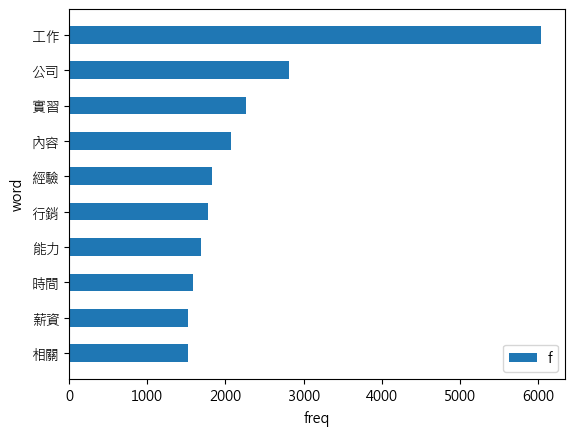

In [16]:
fig, ax = plt.subplots()
tmp = ptt_articleFreq_df['word'][:10]
tmpR = [tmp[i] for i in range(len(tmp)-1,-1,-1)]
ax.barh(tmpR,
        sorted(ptt_articleFreq_df['freq'][:10]), 
        height=0.5, 
        align='center',
        label='freq')
ax.set_ylabel('word')
ax.set_xlabel('freq')
ax.legend('freq', loc ='lower right') 

<Figure size 640x480 with 0 Axes>

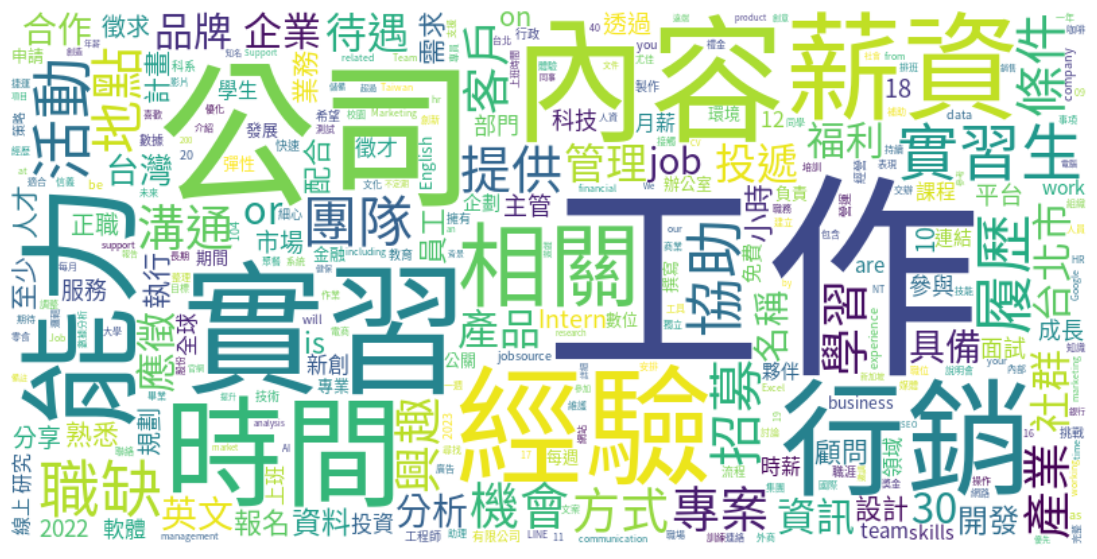

In [17]:
# Generate a word cloud image
font_path = './SourceHanSansTW-Regular.otf'
cloud = WordCloud(max_words=300, background_color="white",width=800, height = 400, font_path=font_path, colormap='viridis')
cloud.generate_from_frequencies({w[1]['word'] : int(w[1]['freq']) for w in ptt_articleFreq_df.iterrows()})
# 繪圖
plt.figure()
plt.figure(figsize=(14,7))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 構面字典

In [18]:
dict_ = pd.read_csv('構面字典-new.csv')
dict_['alias'] = dict_['alias'].apply(lambda x : x.split("|"))
dict_cate = pd.DataFrame(dict_.groupby("class", sort=False)['alias'].apply(lambda x:np.concatenate(list(x))).reset_index())
dict_cate = dict_cate.reset_index()
dict_cate['alias'] = dict_cate['alias'].apply(lambda x : "|".join(x))
dictionary  = dict_cate.set_index("class")["alias"].to_dict()
dictionaryList = list(dictionary.keys())
dictionaryList

['薪資',
 '福利',
 '工時',
 '產品',
 '廣告',
 '人才招募',
 '科系專業',
 '成長價值',
 '經濟報酬',
 '人際價值',
 '組織安全與安定',
 '變化性',
 '產品與服務',
 '公司文化與價值',
 '招募資訊',
 '招募人員',
 '情緒']

#### 公司內外字典

In [19]:
firm_dict = {
    'in-firm' : '裕隆日產汽車|裕隆汽車|中華汽車|納智捷汽車|鴻華先進|格上租車|裕融企業|Nissan|NISSAN|LUXGEN|Luxgen',
    'out-firm' : '和泰汽車|中華賓士|汎德永業|太古汽車|匯豐汽車|中華汽車|福特六和|台灣本田|鴻華先進|國瑞汽車|三陽工業'
}

In [20]:
df_infirm = df_[df_.content.str.contains(firm_dict["in-firm"])].reset_index(drop=True)
df_outfirm = df_[df_.content.str.contains(firm_dict["out-firm"])].reset_index(drop=True)
print(df_infirm.shape)
print(df_outfirm.shape)

(1, 9)
(4, 9)


In [40]:
df_outfirm.loc[3,'Url']

'https://mbasic.facebook.com/groups/jobsandinternship/permalink/1994590600702826/?refid=18&_ft_=encrypted_tracking_data.0AY9ilAFgBfXveBZ7hSndA6kTGy7J1c6KVBELHNduN1LuFsTCQgQWniIpRCcoWzOPQQWq1iA0VyDOnUiviPeQYGHvtdicvB0brkTfG68vmhuBUKt2cZT-AVNms0C1KljmYmnjyYTzIaJTnY-SCms0ktdtwmpnCMCHetS6CdAGuQW27CjQmQwjt_CwVoK-uRYT4Eg1mnYy2kq32ObzR3GKBMrWiDcE3nwpjDQzDP2Lnw2mz-HgHJYJjfZj0M0EBlbYW2jzuS5BotHYIgp4o0QxAoq9TNzTOeHa5HJuN5bOy57-ErCR0aIhNZq6mco1SAHDEcsidMmME4aIbj7Xc-BLFXaQwwF5agIAQCsha8B5VnlTWtrTNoxxSz2jcdr-XUZIdtWEqHyqFNod1-M1ezZyQCHtryRH5J3W56PTfpRMtwv5p234Jhan9Aap6Kc5VcuSHBQCgX7uyS3sLRFR8GIiCtEJrWd_nnXJFOrXova5mvOVK5VgF2afgsPfg8YkwWw0VL0GVfut2ecplS0HFmQtDIkEIRksaPEG8hz02obASshRPlYRYVjzfsoty6wlxTKPOV2hPSs4-SIYvxj8FkSB3g73nTKc9KH2-4WyHzB_QXyRb5wE9O8dydxUWl23bYjvOdQGvX3HHy8gkyB8L16MlVbfWXr-8HpgQgVYsvoXUjNubF6sTHecADcbkf5cAaSUjIu_RMNqhX6-nW5lRNQJIf1DLHWHkQvKYpkpbE_ldULtXw0hl0eRuCNQSlhPZhaTgNIWD1bMCf3f_uDGClvsTn6OQ8sCgp6FxgKntgEIuFALwGxhxJZba8asOlYq9RsAzTuQXhdqPZFmu6n1HKlp8CX1kUEHEw6D4vfJJX2g_v29C03

In [125]:
df_outfirm['comment_num'].max()

1

In [173]:
df_comment = df_[~df_['comments'].isna()]
df_comment.reset_index(drop='index',inplace=True)

In [172]:
def get_comment(dataList):
    text = []
    dataList = eval(dataList)
    for data in dataList:
        text.append(data['comment'])
    return '。'.join(text)

In [168]:
segmentation_used_note = (";", "；", "！", "!", "？", "?", "。")
def comment_segmentation(df, target_column, segment_symboles=[]):
    regexPattern = '['+'|'.join(segment_symboles)+']'
    sentenceCheckRegexPattern = '[,|.| |\t|\n]'

    result = []
    
    for row_dict in df.to_dict(orient="records"):
        sentences = re.split(regexPattern, row_dict[target_column])
        count = 1
        for sent in sentences:
            # if re.sub(sentenceCheckRegexPattern, "", sent):
            temp = row_dict.copy()
            del temp[target_column]
            temp["comment_idx"] = str(count)
            temp["comment"] = sent
            result.append(temp)
            count +=1
    df = pd.DataFrame(result)
    return df

In [175]:
df_comment['comments_text'] = df_comment['comments'].apply(lambda x : get_comment(x))

c:\Users\User\anaconda3\envs\text\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [176]:
df_comment_s = comment_segmentation(df_comment,'comments_text',list(segmentation_used_note))

In [177]:
df_comment_s.head()

,date,Url,content,reaction_like_count,comment_num,poster,posterUrl,comments,sentences,comment_idx,comment
0,2023-04-27,https://mbasic.facebook.com/groups/jobsandinte...,哈囉 幫現在的公司招募實習生，本人心得在工作資訊下方 。 沂動行銷公司 徵求商務拓展部門實習...,4,1,Hope Hsueh,https://mbasic.facebook.com/hopegenius?eav=AfY...,"[{'poster': '林裕棠', 'posterUrl': 'https://mbasi...","[哈囉 幫現在的公司招募實習生，本人心得在工作資訊下方 , 哈囉 幫現在的公司招募實習生，本...",1,請問有些相關細節問題可以私訊您嗎
1,2023-04-27,https://mbasic.facebook.com/groups/jobsandinte...,哈囉 幫現在的公司招募實習生，本人心得在工作資訊下方 。 沂動行銷公司 徵求商務拓展部門實習...,4,1,Hope Hsueh,https://mbasic.facebook.com/hopegenius?eav=AfY...,"[{'poster': '林裕棠', 'posterUrl': 'https://mbasi...","[哈囉 幫現在的公司招募實習生，本人心得在工作資訊下方 , 哈囉 幫現在的公司招募實習生，本...",2,
2,2023-04-29,https://mbasic.facebook.com/groups/jobsandinte...,代朋友PO 徵才。訊息。 公司名稱 Beta Finance 。 工作內容 做產品 寫程式 ...,55,3,游祖鈞,https://mbasic.facebook.com/tzuchun42?eav=Afbw...,"[{'poster': '歐陽廷', 'posterUrl': 'https://mbasi...","[代朋友PO 徵才, 代朋友PO 徵才, 代朋友PO 徵才, 訊息, 公司名稱 Beta ...",1,有鏈上項目徵才就推
3,2023-04-29,https://mbasic.facebook.com/groups/jobsandinte...,代朋友PO 徵才。訊息。 公司名稱 Beta Finance 。 工作內容 做產品 寫程式 ...,55,3,游祖鈞,https://mbasic.facebook.com/tzuchun42?eav=Afbw...,"[{'poster': '歐陽廷', 'posterUrl': 'https://mbasi...","[代朋友PO 徵才, 代朋友PO 徵才, 代朋友PO 徵才, 訊息, 公司名稱 Beta ...",2,推
4,2023-04-29,https://mbasic.facebook.com/groups/jobsandinte...,代朋友PO 徵才。訊息。 公司名稱 Beta Finance 。 工作內容 做產品 寫程式 ...,55,3,游祖鈞,https://mbasic.facebook.com/tzuchun42?eav=Afbw...,"[{'poster': '歐陽廷', 'posterUrl': 'https://mbasi...","[代朋友PO 徵才, 代朋友PO 徵才, 代朋友PO 徵才, 訊息, 公司名稱 Beta ...",3,劉昭佑


In [178]:
len(df_comment_s.groupby('Url', sort=False)['comment'].apply(list).tolist())

552

In [182]:
df_comment_s = comment_segmentation(df_comment,'comments_text',list(segmentation_used_note))
df_comment['comment'] = df_comment_s.groupby('Url', sort=False)['comment'].apply(list).tolist()
df_comment_s['word'] =df_comment_s.comment.apply(getToken)
df_comment_s = df_comment_s.explode('word') # 將word欄位展開
df_comment_s

c:\Users\User\anaconda3\envs\text\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,Url,content,reaction_like_count,comment_num,poster,posterUrl,comments,sentences,comment,comment_idx,word
0,2023-04-27,https://mbasic.facebook.com/groups/jobsandinte...,哈囉 幫現在的公司招募實習生，本人心得在工作資訊下方 。 沂動行銷公司 徵求商務拓展部門實習...,4,1,Hope Hsueh,https://mbasic.facebook.com/hopegenius?eav=AfY...,"[{'poster': '林裕棠', 'posterUrl': 'https://mbasi...","[哈囉 幫現在的公司招募實習生，本人心得在工作資訊下方 , 哈囉 幫現在的公司招募實習生，本...",請問有些相關細節問題可以私訊您嗎,1,請問
0,2023-04-27,https://mbasic.facebook.com/groups/jobsandinte...,哈囉 幫現在的公司招募實習生，本人心得在工作資訊下方 。 沂動行銷公司 徵求商務拓展部門實習...,4,1,Hope Hsueh,https://mbasic.facebook.com/hopegenius?eav=AfY...,"[{'poster': '林裕棠', 'posterUrl': 'https://mbasi...","[哈囉 幫現在的公司招募實習生，本人心得在工作資訊下方 , 哈囉 幫現在的公司招募實習生，本...",請問有些相關細節問題可以私訊您嗎,1,相關
0,2023-04-27,https://mbasic.facebook.com/groups/jobsandinte...,哈囉 幫現在的公司招募實習生，本人心得在工作資訊下方 。 沂動行銷公司 徵求商務拓展部門實習...,4,1,Hope Hsueh,https://mbasic.facebook.com/hopegenius?eav=AfY...,"[{'poster': '林裕棠', 'posterUrl': 'https://mbasi...","[哈囉 幫現在的公司招募實習生，本人心得在工作資訊下方 , 哈囉 幫現在的公司招募實習生，本...",請問有些相關細節問題可以私訊您嗎,1,細節
0,2023-04-27,https://mbasic.facebook.com/groups/jobsandinte...,哈囉 幫現在的公司招募實習生，本人心得在工作資訊下方 。 沂動行銷公司 徵求商務拓展部門實習...,4,1,Hope Hsueh,https://mbasic.facebook.com/hopegenius?eav=AfY...,"[{'poster': '林裕棠', 'posterUrl': 'https://mbasi...","[哈囉 幫現在的公司招募實習生，本人心得在工作資訊下方 , 哈囉 幫現在的公司招募實習生，本...",請問有些相關細節問題可以私訊您嗎,1,私訊
1,2023-04-27,https://mbasic.facebook.com/groups/jobsandinte...,哈囉 幫現在的公司招募實習生，本人心得在工作資訊下方 。 沂動行銷公司 徵求商務拓展部門實習...,4,1,Hope Hsueh,https://mbasic.facebook.com/hopegenius?eav=AfY...,"[{'poster': '林裕棠', 'posterUrl': 'https://mbasi...","[哈囉 幫現在的公司招募實習生，本人心得在工作資訊下方 , 哈囉 幫現在的公司招募實習生，本...",,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1968,2021-05-13,https://mbasic.facebook.com/groups/jobsandinte...,Hi大家 。 食品商Aunt Stella要徵EC囉 同事們很善良好相處，辦公室很美 應徵請...,32,2,Yi Fan Shih,https://mbasic.facebook.com/yifan.shih?eav=AfY...,"[{'poster': '萬家瑜', 'posterUrl': 'https://mbasi...","[Hi大家 , 食品商Aunt Stella要徵EC囉 同事們很善良好相處，辦公室很美 應...",補充說明：公司在產業裡橫跨了不同面向，包含百貨零售、餐飲、贈禮等市場，如果對食品業有興趣的人...,2,食品業
1968,2021-05-13,https://mbasic.facebook.com/groups/jobsandinte...,Hi大家 。 食品商Aunt Stella要徵EC囉 同事們很善良好相處，辦公室很美 應徵請...,32,2,Yi Fan Shih,https://mbasic.facebook.com/yifan.shih?eav=AfY...,"[{'poster': '萬家瑜', 'posterUrl': 'https://mbasi...","[Hi大家 , 食品商Aunt Stella要徵EC囉 同事們很善良好相處，辦公室很美 應...",補充說明：公司在產業裡橫跨了不同面向，包含百貨零售、餐飲、贈禮等市場，如果對食品業有興趣的人...,2,興趣
1968,2021-05-13,https://mbasic.facebook.com/groups/jobsandinte...,Hi大家 。 食品商Aunt Stella要徵EC囉 同事們很善良好相處，辦公室很美 應徵請...,32,2,Yi Fan Shih,https://mbasic.facebook.com/yifan.shih?eav=AfY...,"[{'poster': '萬家瑜', 'posterUrl': 'https://mbasi...","[Hi大家 , 食品商Aunt Stella要徵EC囉 同事們很善良好相處，辦公室很美 應...",補充說明：公司在產業裡橫跨了不同面向，包含百貨零售、餐飲、贈禮等市場，如果對食品業有興趣的人...,2,試試看
1969,2021-05-11,https://mbasic.facebook.com/groups/jobsandinte...,公司名稱 國泰金控。 部門名稱 數位數據暨科技發展中心 國泰金融創新實驗室。 工作職缺 金融...,46,2,李大慶,https://mbasic.facebook.com/jason.li.3745?eav=...,"[{'poster': '鄭惟娟', 'posterUrl': 'https://mbasi...","[公司名稱 國泰金控, 公司名稱 國泰金控, 公司名稱 國泰金控, 公司名稱 國泰金控, ...",推推,1,推推


In [183]:
ptt_commentFreq_df = pd.DataFrame(df_comment_s['word'].value_counts())
ptt_commentFreq_df = ptt_commentFreq_df.reset_index()
ptt_commentFreq_df.columns = ['word', 'freq']
ptt_commentFreq_df

,word,freq
0,推推,186
1,https,64
2,履歷,35
3,com,35
4,職缺,33
...,...,...
1907,Kang,1
1908,出路,1
1909,生命,1
1910,吳亮,1


In [187]:
stop_word_update = stopWords + ['https','com','www','and','to','in','the','for','with','of','00','000']
for index,token in enumerate(df_comment_s['word']):
    if token in stop_word_update:
        df_comment_s = df_comment_s[~df_comment_s['word'].isin([token])]
ptt_commentFreq_df = pd.DataFrame(df_comment_s['word'].value_counts())
ptt_commentFreq_df = ptt_commentFreq_df.reset_index()
ptt_commentFreq_df.columns = ['word', 'freq']
ptt_commentFreq_df

,word,freq
0,推推,186
1,履歷,35
2,職缺,33
3,投遞,33
4,興趣,30
...,...,...
1900,Kang,1
1901,出路,1
1902,生命,1
1903,吳亮,1


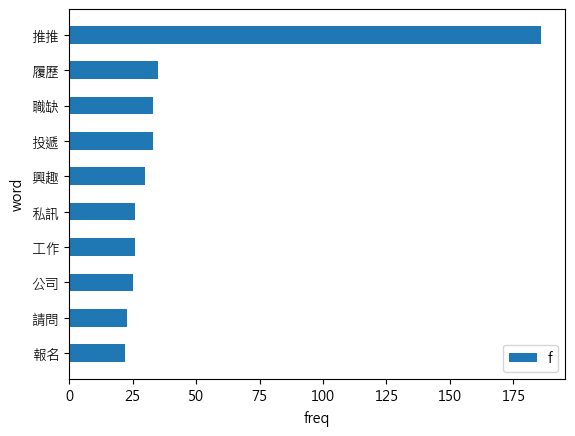

In [188]:
fig, ax = plt.subplots()
tmp = ptt_commentFreq_df['word'][:10]
tmpR = [tmp[i] for i in range(len(tmp)-1,-1,-1)]
ax.barh(tmpR,
        sorted(ptt_commentFreq_df['freq'][:10]), 
        height=0.5, 
        align='center',
        label='freq')
ax.set_ylabel('word')
ax.set_xlabel('freq')
ax.legend('freq', loc ='lower right') 

<Figure size 640x480 with 0 Axes>

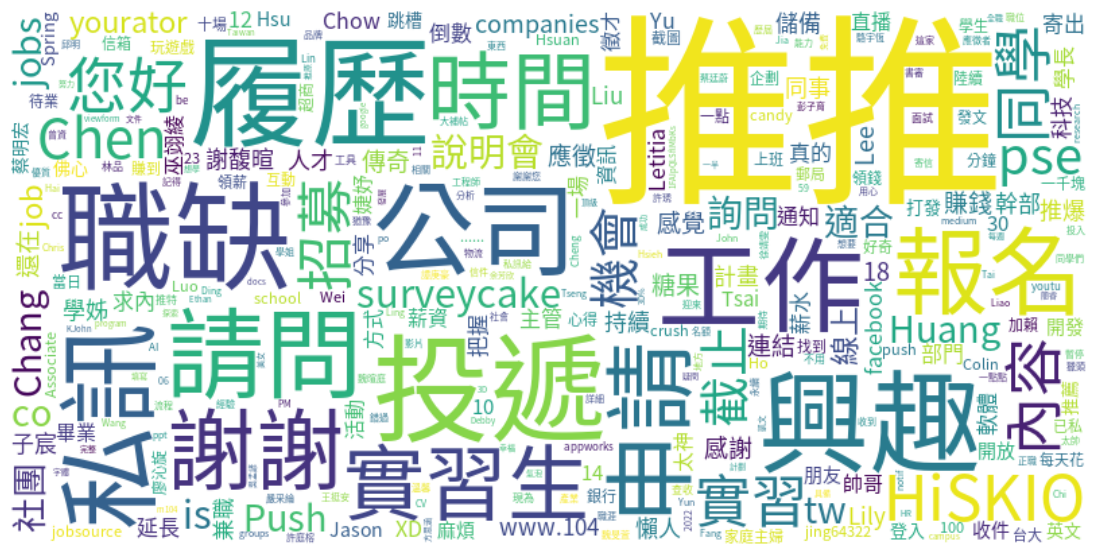

In [189]:
# Generate a word cloud image
font_path = './SourceHanSansTW-Regular.otf'
cloud = WordCloud(max_words=300, background_color="white",width=800, height = 400, font_path=font_path, colormap='viridis')
cloud.generate_from_frequencies({w[1]['word'] : int(w[1]['freq']) for w in ptt_commentFreq_df.iterrows()})
# 繪圖
plt.figure()
plt.figure(figsize=(14,7))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()